In [12]:
import pandas as pd
import numpy as np
%matplotlib inline

In [13]:
# Load a non-stationary dataset
df1 = pd.read_csv("Data/airline_passengers.csv",parse_dates=True,index_col="Month")
df1 = df1.asfreq('MS')

In [14]:
# Load a stationary dataset
df2 = pd.read_csv("Data/DailyTotalFemaleBirths.csv",parse_dates=True,index_col="Date")
df2 = df2.asfreq('D')

In [27]:
df3 = pd.read_csv("Data/TradeInventories.csv",parse_dates=True,index_col="Date")
df3 = df3.asfreq('MS')

In [26]:
# pip install pmdarima - Grid search
from pmdarima import auto_arima

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#initializing - stepwise fit
stepwise_fit_1 = auto_arima(df2['Births'].astype(np.float),start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.024 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.083 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.000, Fit time=0.257 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.875, BIC=2485.258, Fit time=0.440 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.120 seconds
Total fit time: 0.988 seconds


In [21]:
#Best performing model
stepwise_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Sun, 11 Aug 2019   AIC                           2460.154
Time:                        05:48:54   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
stepwise_fit_2 = auto_arima(df1['Thousands of Passengers'].astype(np.float),start_p=0,start_q=0,max_p=4,max_q=4,
                           seasonal=True,trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=1034.075, BIC=1045.576, Fit time=0.556 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.414 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.418 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.137, BIC=1035.513, Fit time=1.084 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.164, BIC=1034.415, Fit time=3.440 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.844, BIC=1048.220, Fit time=2.859 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.207, BIC=1038.333, Fit time=4.213 seconds
Fit ARIMA: order=(1, 1, 1) s

In [23]:
stepwise_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.816
Date:                            Sun, 11 Aug 2019   AIC                           1015.631
Time:                                    05:51:51   BIC                           1038.633
Sample:                                         0   HQIC                          1024.978
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.014      0.034      0.973      -0.027       0.028
ar.L1          0.5533      0.108      5.115      0.000       0.341       0.765
ar.L2          0.2307      0.104      2.218      0.027       0.027       0.435
ma.L1         -0.9612      0.070    -13.802      0.000      -1.098      -0.825
ar.S.L12       0.6889      0.316      2.183      0.029       0.071       1.307
ar.S.L24       0.2995      0.125      2.404      0.016       0.055       0.544
ma.S.L12      -0.9466      0.804     -1.178      0.239      -2.521       0.628
sigma2       115.0726     48.960      2.350      0.019      19.113     211.032
===================================================================================
Ljung-Box (Q):                       53.77   Jarque-Bera (JB):                14.97
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Building ARMA and ARIMA model

In [24]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ARMA

In [29]:
df2_arma = df2[:120]

In [31]:
df2_arma.count()

Births    120
dtype: int64

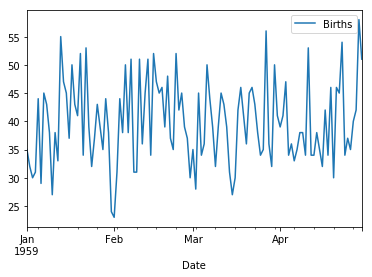

In [33]:
df2_arma.plot() #Stationary

In [34]:
#Check for stationary - ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [35]:
adf_test(df2_arma['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [36]:
auto_arima(df2_arma['Births'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 11 Aug 2019   AIC                            823.489
Time:                        06:05:53   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#To forecast 1-month to the future
train_df2 = df2_arma.iloc[:90]
test_df2 = df2_arma.iloc[90:]

In [38]:
model_df2 = ARMA(train_df2['Births'],order=(2,2))

In [39]:
results_df2 = model_df2.fit()

In [41]:
start = len(train_df2)
end = len(train_df2) + len(test_df2) - 1

In [42]:
predictions_df2 = results_df2.predict(start,end).rename('ARMA 2 2 Predictions')

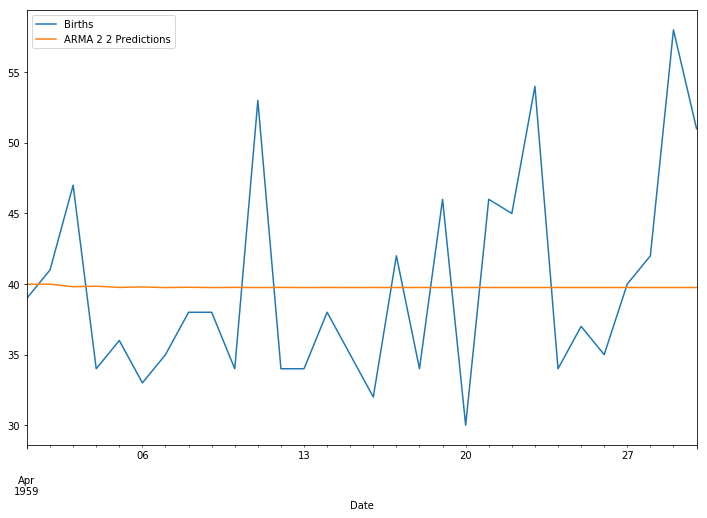

In [45]:
test_df2['Births'].plot(figsize=(12,8),legend=True)
predictions_df2.plot(legend=True)

In [46]:
predictions_df2.mean()

39.777427822039044

In [47]:
test_df2.mean()

Births    39.833333
dtype: float64

In [48]:
#The mean of the test model and the prediction model is very similar.

# ARIMA

In [49]:
#Using data of link: https://fred.stlouisfed.org/series/INVCMRMT

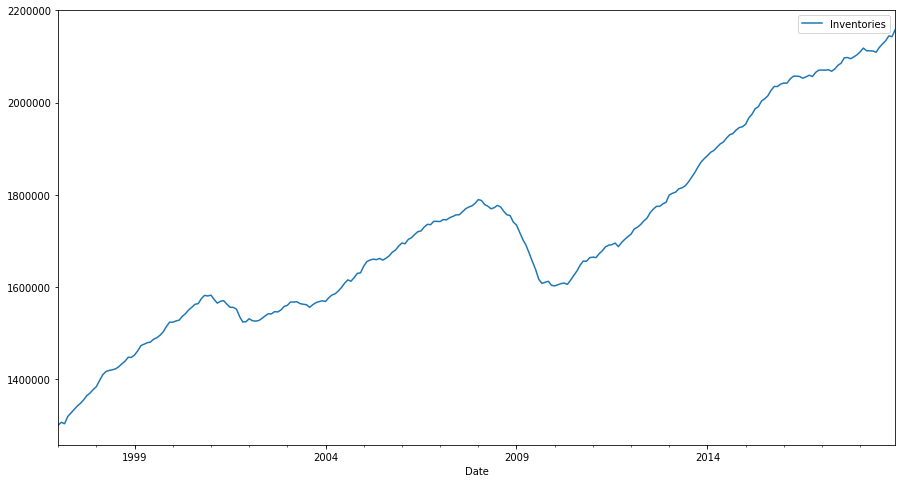

In [51]:
df3.plot(figsize=(15,8))

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

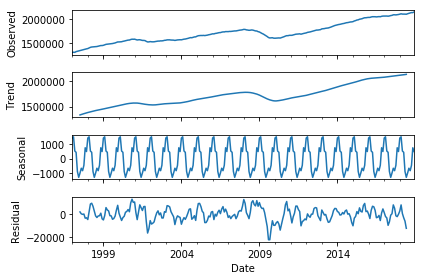

In [53]:
results_df3_ETS = seasonal_decompose(df3['Inventories'],model='add')
results_df3_ETS.plot();

In [54]:
auto_arima(df3['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.267
Date:                Sun, 11 Aug 2019   AIC                           5228.506
Time:                        06:24:41   BIC                           5242.794
Sample:                             1   HQIC                          5234.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3440.8584   1312.000      2.623      0.009     869.386    6012.330
ar.L1.D.y      0.9037      0.039     23.412      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
#train-test 
train_df3 = df3.iloc[:252]
test_df3 = df3.iloc[252:]

In [56]:
model_df3 = ARIMA(train_df3['Inventories'],order=(1,1,1))


In [57]:
results_df3 = model_df3.fit()

In [58]:
results_df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.008
Date:                Sun, 11 Aug 2019   AIC                           4980.788
Time:                        06:32:26   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3233.7679   1344.917      2.404      0.017     597.779    5869.757
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
start_df3 = len(train_df3)
end_df3 = len(train_df3) + len(test_df3) - 1
predictions_df3 = results_df3.predict(start=start,end=end,typ='levels').rename('ARIMA 1 1 1 Predictions')

In [72]:
predictions_df3

Date
2004-07-01    1.604629e+06
2004-08-01    1.615183e+06
2004-09-01    1.622190e+06
2004-10-01    1.615910e+06
2004-11-01    1.625431e+06
2004-12-01    1.636009e+06
2005-01-01    1.635097e+06
2005-02-01    1.653149e+06
2005-03-01    1.663434e+06
2005-04-01    1.664811e+06
2005-05-01    1.664937e+06
2005-06-01    1.661924e+06
2005-07-01    1.664859e+06
2005-08-01    1.659119e+06
2005-09-01    1.664662e+06
2005-10-01    1.671146e+06
2005-11-01    1.680682e+06
2005-12-01    1.685140e+06
2006-01-01    1.695046e+06
2006-02-01    1.701493e+06
2006-03-01    1.697231e+06
2006-04-01    1.708730e+06
2006-05-01    1.711655e+06
2006-06-01    1.719418e+06
2006-07-01    1.725669e+06
2006-08-01    1.725661e+06
2006-09-01    1.735611e+06
2006-10-01    1.741520e+06
2006-11-01    1.738516e+06
2006-12-01    1.747101e+06
Freq: MS, Name: ARIMA 1 1 1 Predictions, dtype: float64

In [75]:
#forecasting 

In [76]:
model_df3_forecast = ARIMA(df3['Inventories'],order=(1,1,1))

In [77]:
results_df3_forecast = model_df3_forecast.fit()

In [78]:
fcast_df3 = results_df3_forecast.predict(start=len(df3),end=len(df3)+11,typ='levels').rename("ARIMA 1 1 1 Forecast")

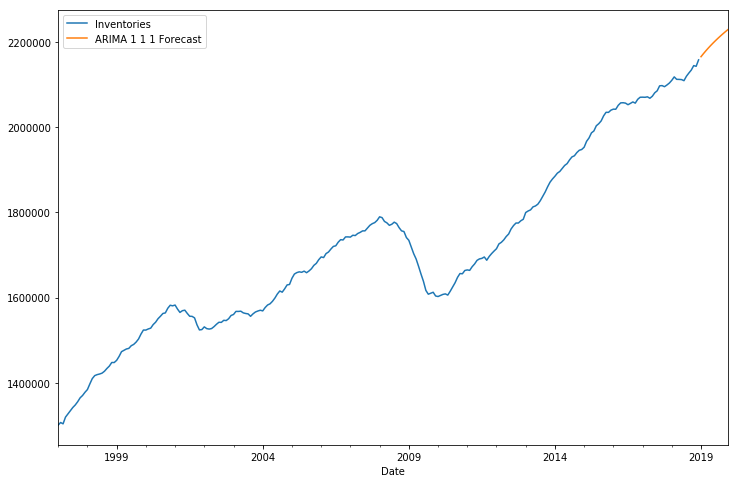

In [80]:
df3['Inventories'].plot(figsize=(12,8),legend=True)
fcast_df3.plot(legend=True)

In [81]:
fcast_df3

2019-01-01    2.165602e+06
2019-02-01    2.172699e+06
2019-03-01    2.179443e+06
2019-04-01    2.185870e+06
2019-05-01    2.192009e+06
2019-06-01    2.197888e+06
2019-07-01    2.203532e+06
2019-08-01    2.208963e+06
2019-09-01    2.214203e+06
2019-10-01    2.219270e+06
2019-11-01    2.224180e+06
2019-12-01    2.228949e+06
Freq: MS, Name: ARIMA 1 1 1 Forecast, dtype: float64